### 3 Setting up difference equations (Measles)

Set up the SEIR model of the transmission dynamics of measles in a closed population using difference equations:
 
We assume that individuals mix randomly and parameter values are given as follows: 

* Population 100,000 people
* Pre-infectious period 8 days
* Infectious period 7 days
* Basic reproduction number 13
* Life Expectancy 70 years
* Initial values (S,E,I,R)=(99999,0,1,0)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import pandas as pd

### PART I: Setting up difference equations


#### 1. Plot a graph for number of susceptible, pre-Infectious, infectious, and recovered populations during 200 days.


In [2]:
# Setting up Differential Equation
N = 100000
pre_inf = 8
D = 7
R_0 = 13
life = 70*365

#initial value
S0 = 99999 ; E0 = 0 ; I0 = 1 ; R0 = 0
Initial = (S0,E0,I0,R0)

# variable
f = 1/pre_inf
gamma = 1/D
beta = R_0/(N*D)

In [3]:
# Allocate memories
tspan = 200
dt = 1
S = np.zeros(tspan)
E = np.zeros(tspan)
I = np.zeros(tspan)
R = np.zeros(tspan)
S[0]=S0;E[0]=E0;I[0]=I0;R[0]=R0

In [4]:
for i in range(200-1):
    S[i+1]= S[i]+(-beta*S[i]*I[i])*dt
    E[i+1]= E[i]+(beta * S[i]*I[i]-f*E[i])*dt
    I[i+1]= I[i]+(f*E[i]-gamma*I[i])*dt
    R[i+1]= R[i]+(gamma*I[i])*dt

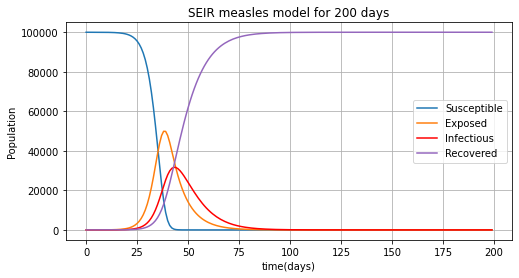

In [5]:
#Visualize
plt.figure(figsize=(8,4))
plt.plot(S, label='Susceptible' , color='#1f77b4')
plt.plot(E, label='Exposed' , color='#ff7f0e')
plt.plot(I, label='Infectious', color='r')
plt.plot(R, label='Recovered', color='#9467bd')
plt.xlabel('time(days)')
plt.ylabel('Population')
plt.title('SEIR measles model for 200 days')
plt.legend(loc='best')
plt.grid()
plt.show()

#### 2. How long does it take before there are no infectious persons in the population?Why do no further new infectious persons occur in this population after a certain time?

새로운 감염자가 137일 이후로 발생하지 않는 이유는 전파가 진행되며 Susceptible이 더 이상 없어 (New born도 없음) 감염시킬 인구가 사라졌기때문이다. 

In [6]:
b = np.argmax(I) # I의 최댓값 인덱스 찾기
for i in range(b,tspan-1):
    if I[i]<1:
        Free = i+1;
        break
print('전염병이 소멸되는 날짜는 {}일 후 입니다.\n'.format(Free));

전염병이 소멸되는 날짜는 137일 후 입니다.



#### 3. How does the graph change if you change the pre-infectious period to be 5 days and 20 days, respectively?

pre-infectious period가 길어질 수록 전염이 퍼지는 속도도 느려지며 전염병이 소명되는 날짜도 점점 늘어난다. 그리고 pre-infectious period가 길어질 수록 peak에서의 감염자의 최댓값이 점점 작아진다.


In [7]:
pre_inf = np.array([5,8,20])
f_val = 1/pre_inf;
n = f_val.size
tspan = 200
S = np.zeros([n,tspan])
E = np.zeros([n,tspan])
I = np.zeros([n,tspan])
R = np.zeros([n,tspan])

S[:,0]=S0;E[:,0]=E0;I[:,0]=I0;R[:,0]=R0

for j in range(n):
    for i in range(tspan-1):
        S[j,i+1]= S[j,i]+(-beta*S[j,i]*I[j,i])*dt
        E[j,i+1]= E[j,i]+(beta * S[j,i]*I[j,i]-f_val[j]*E[j,i])*dt
        I[j,i+1]= I[j,i]+(f_val[j]*E[j,i]-gamma*I[j,i])*dt
        R[j,i+1]= R[j,i]+(gamma*I[j,i])*dt

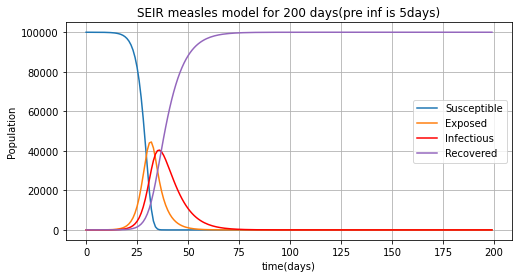

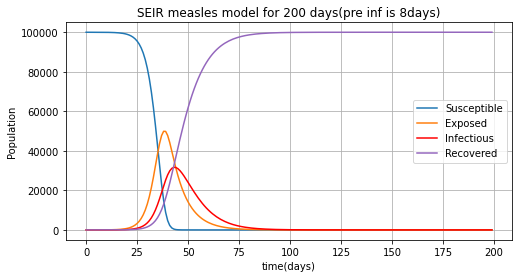

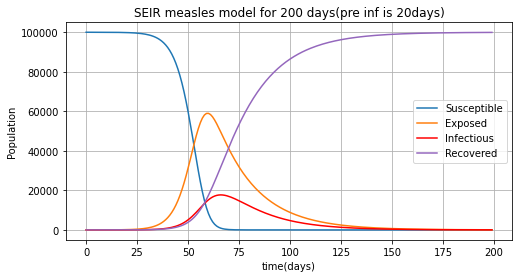

In [8]:
#Visualize
for j in range(n):
    plt.figure(figsize=(8,4))
    plt.plot(S[j,:], label='Susceptible' , color='#1f77b4')
    plt.plot(E[j,:], label='Exposed' , color='#ff7f0e')
    plt.plot(I[j,:], label='Infectious', color='r')
    plt.plot(R[j,:], label='Recovered', color='#9467bd')
    plt.xlabel('time(days)')
    plt.ylabel('Population')
    plt.title('SEIR measles model for 200 days(pre inf is {}days)'.format(pre_inf[j]))
    plt.legend(loc='best')
    plt.grid()
    plt.show()

### PART Ⅱ: Incorporating births and deaths


#### 5. Assuming that the population size doesn’t change over time, what would be an appropriate expression for the per capita birth rate and death rate?

In [9]:
life = 70*365
death = 1/life
birth = N*death

tspan = 200
dt = 1

S = np.zeros(tspan)
E = np.zeros(tspan)
I = np.zeros(tspan)
R = np.zeros(tspan)
S[0]=S0;E[0]=E0;I[0]=I0;R[0]=R0

for i in range(200-1):
    S[i+1]= S[i]+(birth-beta*S[i]*I[i]-death*S[i])*dt
    E[i+1]= E[i]+(beta * S[i]*I[i]-f*E[i]-death*E[i])*dt
    I[i+1]= I[i]+(f*E[i]-gamma*I[i]-death*I[i])*dt
    R[i+1]= R[i]+(gamma*I[i]-death*R[i])*dt

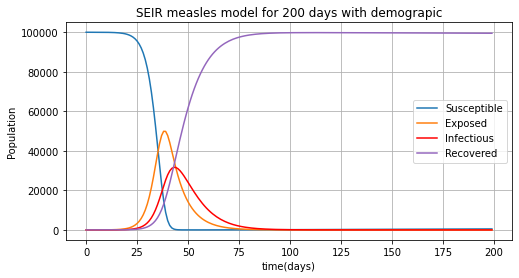

In [10]:
plt.figure(figsize=(8,4))
plt.plot(S, label='Susceptible' , color='#1f77b4')
plt.plot(E, label='Exposed' , color='#ff7f0e')
plt.plot(I, label='Infectious', color='r')
plt.plot(R, label='Recovered', color='#9467bd')
plt.xlabel('time(days)')
plt.ylabel('Population')
plt.title('SEIR measles model for 200 days with demograpic')
plt.legend(loc='best')
plt.grid()
plt.show()

#### 7-1. Is there a point where no more infections occur? 

In [11]:
b = np.argmax(I) # I의 최댓값 인덱스 찾기
for i in range(b,tspan-1):
    if I[i]<1:
        Free = i+1;
        break
print('전염병이 소멸되는 날짜는 {}일 후 입니다.\n'.format(Free));

전염병이 소멸되는 날짜는 140일 후 입니다.



#### 7-2. What about 10 years? 50 years?

In [12]:
life = 70*365
death = 1/life
birth = N*death

tspan = 100*365
dt = 1
time_stamp = np.linspace(1,tspan,tspan)


S = np.zeros(tspan)
E = np.zeros(tspan)
I = np.zeros(tspan)
R = np.zeros(tspan)
S[0]=S0;E[0]=E0;I[0]=I0;R[0]=R0

for i in range(tspan-1):
    S[i+1]= S[i]+(birth-beta*S[i]*I[i]-death*S[i])*dt
    E[i+1]= E[i]+(beta * S[i]*I[i]-f*E[i]-death*E[i])*dt
    I[i+1]= I[i]+(f*E[i]-gamma*I[i]-death*I[i])*dt
    R[i+1]= R[i]+(gamma*I[i]-death*R[i])*dt

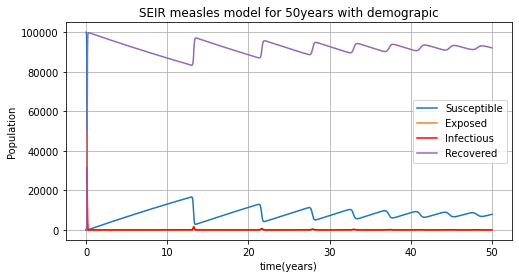

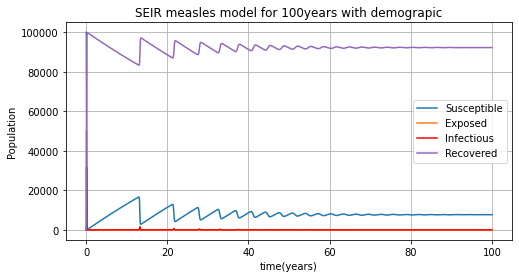

In [13]:
plt.figure(figsize=(8,4))
plt.plot(time_stamp[0:50*365]/365,S[0:50*365], label='Susceptible' , color='#1f77b4')
plt.plot(time_stamp[0:50*365]/365,E[0:50*365], label='Exposed' , color='#ff7f0e')
plt.plot(time_stamp[0:50*365]/365,I[0:50*365], label='Infectious', color='r')
plt.plot(time_stamp[0:50*365]/365,R[0:50*365], label='Recovered', color='#9467bd')
plt.xlabel('time(years)')
plt.ylabel('Population')
plt.title('SEIR measles model for 50years with demograpic')
plt.legend(loc='best')
plt.grid()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(time_stamp/365,S, label='Susceptible' , color='#1f77b4')
plt.plot(time_stamp/365,E, label='Exposed' , color='#ff7f0e')
plt.plot(time_stamp/365,I, label='Infectious', color='r')
plt.plot(time_stamp/365,R, label='Recovered', color='#9467bd')
plt.xlabel('time(years)')
plt.ylabel('Population')
plt.title('SEIR measles model for 100years with demograpic')
plt.legend(loc='best')
plt.grid()
plt.show()

#### 9. unit time을 2 3 4 5 10 로 바꿔보자 

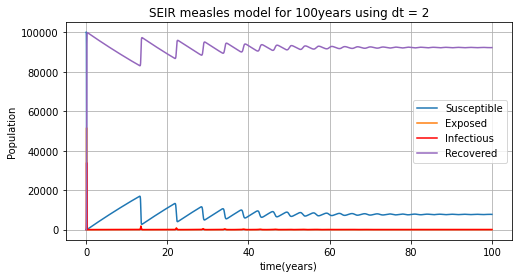

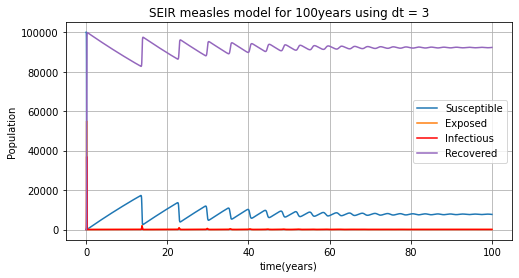

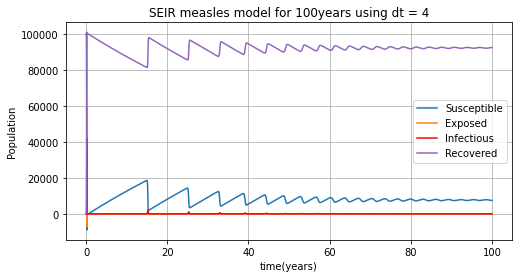

C:\Users\user\AppData\Local\Temp/ipykernel_12892/1802880913.py:14: RuntimeWarning: overflow encountered in double_scalars
  S[i+1]= S[i]+(birth-beta*S[i]*I[i]-death*S[i])*dt[j]
C:\Users\user\AppData\Local\Temp/ipykernel_12892/1802880913.py:15: RuntimeWarning: overflow encountered in double_scalars
  E[i+1]= E[i]+(beta * S[i]*I[i]-f*E[i]-death*E[i])*dt[j]
C:\Users\user\AppData\Local\Temp/ipykernel_12892/1802880913.py:14: RuntimeWarning: invalid value encountered in double_scalars
  S[i+1]= S[i]+(birth-beta*S[i]*I[i]-death*S[i])*dt[j]
C:\Users\user\AppData\Local\Temp/ipykernel_12892/1802880913.py:15: RuntimeWarning: invalid value encountered in double_scalars
  E[i+1]= E[i]+(beta * S[i]*I[i]-f*E[i]-death*E[i])*dt[j]


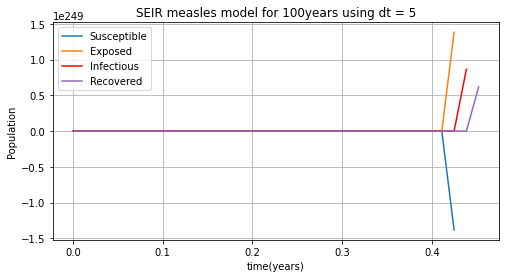

In [14]:
tspan = 100*365
dt= np.array([2, 3, 4, 5])
n = dt.size

for j in range(n):
    t_stamp = np.arange(0,tspan,dt[j])
    S = np.zeros(t_stamp.size)
    E = np.zeros(t_stamp.size)
    I = np.zeros(t_stamp.size)
    R = np.zeros(t_stamp.size)
    S[0]=S0;E[0]=E0;I[0]=I0;R[0]=R0
    
    for i in range(t_stamp.size-1):
        S[i+1]= S[i]+(birth-beta*S[i]*I[i]-death*S[i])*dt[j]
        E[i+1]= E[i]+(beta * S[i]*I[i]-f*E[i]-death*E[i])*dt[j]
        I[i+1]= I[i]+(f*E[i]-gamma*I[i]-death*I[i])*dt[j]
        R[i+1]= R[i]+(gamma*I[i]-death*R[i])*dt[j]
        
    plt.figure(figsize=(8,4))
    plt.plot(t_stamp/365,S,label='Susceptible' , color='#1f77b4')
    plt.plot(t_stamp/365,E,label='Exposed' , color='#ff7f0e')
    plt.plot(t_stamp/365,I,label='Infectious', color='r')
    plt.plot(t_stamp/365,R,label='Recovered', color='#9467bd')
    plt.xlabel('time(years)')
    plt.ylabel('Population')
    plt.title('SEIR measles model for 100years using dt = {}'.format(dt[j]))
    plt.legend(loc='best')
    plt.grid()
    plt.show()